# Основы работы с количественными данными

*Алла Тамбовцева*

## Практикум 2. Работа с массивами и датафреймами `pandas`


## Теория: проверка условий в Python

Сохраним в переменные `a`, `b` и `c` числа 5, 5 и 20:

In [1]:
a = 5
b = 5
c = 20

Проверим простое условие – правда ли, что `a` меньше `c`:

In [2]:
a < c

True

А теперь – правда ли, что `a` не меньше `b`:

In [3]:
a >= b

True

По аналогии можем проверить и другие довольно привычные условия:

In [4]:
a > b

False

In [5]:
c <= b

False

Сравним значения `a` и `b`, проверив их равенство:

In [6]:
a == b

True

А теперь построим отрицание к равенству – проверим, правда ли, что `a` не равно `c`:

In [7]:
a != c

True

Итак, с основными условиями мы познакомились, теперь давайте посмотрим, как их объединять.

Если условия должны выполняться **одновременно**, то их можно объединить с помощью оператора `&` (оператор AND). Проверим, правда ли, что `a` равно `b` и одновременно меньше `c`:

In [8]:
# первое True, второе True -> все True

(a == b) & (a < c)

True

Если хотя бы одно из условий не выполняется, проверка их совместного выполнения вернёт `False`:

In [9]:
# первое True, второе False -> все False

(a > c) & (a < c)

False

Если должно выполняться **хотя бы одно** условие из двух, их можно объединить с помощью оператора `|` (оператор OR). Проверим, правда ли, что хотя бы одно верно: или `a` меньше `b`, или `a` меньше `c`:

In [10]:
# первое False, второе True -> все True

(a < b) | (a < c) 

True

Так как «хотя бы одно верно» расшифровывается как «одно верно» или «оба верны», в случае, если выполняются оба условия, выражение с `|` тоже возвращает `True`:

In [11]:
# первое True, второе True -> все True

(a < b) | (a < c) 

True

Как проверять условия для одиночных значений, мы разобрали. Остаётся вопрос: а как делать это для массивов? Попробуем создать массив и проверить какие-нибудь условия!

Создадим массив `times`, который содержит выборку значений времени в минутах, которое жители Москвы тратят на дорогу до работы:

In [12]:
import numpy as np

In [13]:
times = np.array([40, 50, 120, 55, 32, 20, 100, 150, 60, 60, 70, 
          50, 40, 30, 120, 130, 90, 90, 40, 50, 45, 35])

Попробуем выбрать из массива значения больше 60:

In [14]:
times > 60

array([False, False,  True, False, False, False,  True,  True, False,
       False,  True, False, False, False,  True,  True,  True,  True,
       False, False, False, False])

Что произошло? Python честно проверил выполнение условия для каждого значения в массиве и вернул набор из `True ` и `False`. Чтобы выбрать значения, которые удовлетворяют сформулированному условию (то есть те, на которых условие выше вернуло `True`), нужно поместить условие в квадратные скобки после названия массива – так работает фильтрация:

In [15]:
times[times > 60]

array([120, 100, 150,  70, 120, 130,  90,  90])

Сформулируем условие посложнее – выберем элементы, которые одновременно не меньше 60 и не больше 90:

In [16]:
times[(times >= 60) & (times <= 90)]

array([60, 60, 70, 90, 90])

Как посчитать число элементов, которые удовлетворяют какому-то условию? Можно вызвать атрибут `.size`:

In [17]:
chosen = times[(times >= 60) & (times <= 90)]
chosen.size

5

In [18]:
# или сразу так

times[(times >= 60) & (times <= 90)].size

5

## Часть 1: работа с массивом

В массиве `pumpkins` сохранены значения веса тыкв (в килограммах), которые выращивает Хагрид для украшения Хогвартса к Хэллоуину:

In [19]:
pumpkins = np.array([305, 306, 380, 450, 505, 499, 20, 350, 600, 540, 320, 
                    340, 375, 355, 480, 500, 520, 523, 610, 302, 304, 314, 15])

### Задача 1

Найдите минимальное и максимальное значение выборки, вычислите размах.

In [20]:
np.min(pumpkins)

15

In [21]:
np.max(pumpkins)

610

### Задача 2

Найдите выборочное среднее и выборочную медиану.

In [22]:
np.mean(pumpkins)

387.5217391304348

In [23]:
np.median(pumpkins)

375.0

### Задача 3

Найдите нижний и верхний квартили, сохраните их в переменные `q1` и `q3` соответственно.

In [24]:
q1 = np.quantile(pumpkins, 0.25)
q3 = np.quantile(pumpkins, 0.75)
print(q1, q3)

310.0 502.5


###  Задача 4

Используя результаты предыдущей задачи, вычислите межквартильный размах и сохраните его в переменную `iq`.

In [25]:
iq = q3 - q1
print(iq)

192.5


### Задача 5

Вычислите нижнюю и верхнюю границу типичных значений и сохраните их в переменные `lower` и `upper` соответственно.

In [26]:
lower = q1 - 1.5 * iq
upper = q3 + 1.5 * iq
print(lower, upper)

21.25 791.25


### Задача 6

Определите, есть ли в массиве нетипичные наблюдения, то есть выберите те значения массива, которые не входят в интервал между `lower` и `upper`, посчитанными ранее. Если такие наблюдения есть, посчитайте их количество.

In [27]:
pumpkins[(pumpkins < lower) | (pumpkins > upper)]

array([20, 15])

In [28]:
pumpkins[(pumpkins < lower) | (pumpkins > upper)].size

2

## Часть 2: работа с реальными данными

В этом практикуме мы будем работать с данными по ценам на квартиры в Москве из файла `flats.csv`. 

Переменные в файле: 

* `price`: цена квартиры, в тысячах долларов;
* `totsp`: общая площадь, в кв.метрах;
* `livesp`: жилая площадь, в кв.метрах;
* `kitsp`: площадь кухни, в кв.метрах;
* `dist`: расстояние до центра города, в км;
* `metrdist`: расстояние до метро, в мин;
* `walk`: шаговая доступность до метро, 0 или 1;
* `brick`: дом из кирпича или аналогичного «капитального» материала, 0 или 1; 
* `floor`: удобный ли этаж (не первый и последний), 0 или 1.

Для работы с данными, сохраненными в формате CSV или Excel, нам понадобится ещё одна библиотека – библиотека `pandas`. Импортируем её по аналогии с `numpy` с сокращённым названием `pd`:

In [29]:
import pandas as pd

Загрузим сам файл с данными в Google Colab или Jupyter Notebook. 

**Пояснение для Google Colab.** Загрузить файл с данными в облачное хранилище можно через кнопку *Files* (значок папки слева от рабочей области с ячейками), при нажатии на которую появляется возможность выбрать файл с компьютера (значок стрелки). После добавления файла его можно выбрать, кликнуть на три точки справа от названия, скопировать путь через *Copy path* и вставить его в функцию `read_csv()` для чтения CSV-файла. Например:

    df = pd.read_csv("/content/flats.csv")
    
**Пояснение для Jupyter Notebook.** Удобно, если файл с данными при работе лежит в той же папке, что и текущий ipynb-файл, в котором мы запускаем код, так не придется полностью прописывать к нему путь, достаточно одного названия с расширением. Загрузить файл с данными в Jupyter можно через *Upload* на *Home Page* (по аналогии с загрузкой ipynb-файлов). После добавления файла его название с расширением можно вставить в функцию `read_csv()` для чтения CSV-файла. Например:

    df = pd.read_csv("flats.csv")

Загрузим данные из файла `flats.csv` и сохраним их в таблицу – **датафрейм** `df`. Но сначала загрузим файл с данными в Google Colab.

In [30]:
df = pd.read_csv("/content/flats.csv") # в Jupyter просто df = pd.read_csv("flats.csv")

Посмотрим на датафрейм:

In [31]:
df

,price,totsp,livesp,kitsp,dist,metrdist,walk,brick,floor
0,730,134,102,10.0,9.0,10,1,1,1
1,477,119,93,15.0,9.0,1,1,0,1
2,350,80,44,14.0,10.5,10,1,1,0
3,410,102,75,10.0,6.5,5,1,1,1
4,50,63,47,7.0,12.0,20,0,1,0
...,...,...,...,...,...,...,...,...,...
2035,117,76,43,10.0,12.0,5,1,0,1
2036,91,60,44,6.0,14.5,7,1,0,1
2037,94,65,40,8.0,14.5,15,1,0,1
2038,110,74,44,10.0,13.0,7,1,0,1


Посмотрим на переменные и проверим, что все переменные корректных типов (например, числа считаны как числа, а не как текст):

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2040 entries, 0 to 2039
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   price     2040 non-null   int64  
 1   totsp     2040 non-null   int64  
 2   livesp    2040 non-null   int64  
 3   kitsp     2040 non-null   float64
 4   dist      2040 non-null   float64
 5   metrdist  2040 non-null   int64  
 6   walk      2040 non-null   int64  
 7   brick     2040 non-null   int64  
 8   floor     2040 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 143.6 KB


Примечания: 

* `Non-Null Count`: число заполненных – не пустых (`null`) – ячеек в столбце;
* `Dtype`: тип столбца; тип `int` — целочисленный (*integer*), тип `float` — вещественный, может включать в себя как дробные, так и целочисленные значения.

Посмотрим на описательные статистики по всем столбцам:

In [33]:
df.describe() # давайте проинтерпретируем

,price,totsp,livesp,kitsp,dist,metrdist,walk,brick,floor
count,2040.000000,2040.000000,2040.000000,2040.000000,2040.000000,2040.000000,2040.000000,2040.000000,2040.000000
mean,127.496569,73.084314,46.337255,8.898529,11.015686,8.117157,0.685784,0.323039,0.790686
std,51.878220,15.123450,7.894348,2.787073,3.375539,3.815574,0.464317,0.467752,0.406918
min,50.000000,44.000000,28.000000,5.000000,3.000000,1.000000,0.000000,0.000000,0.000000
25%,95.000000,62.000000,42.000000,7.000000,9.000000,5.000000,0.000000,0.000000,1.000000
50%,115.000000,73.500000,45.000000,9.000000,12.000000,7.000000,1.000000,0.000000,1.000000
75%,142.000000,79.000000,50.000000,10.000000,13.500000,10.000000,1.000000,1.000000,1.000000
max,730.000000,192.000000,102.000000,25.000000,17.000000,20.000000,1.000000,1.000000,1.000000


> **Пояснения к выдаче:** 
>    
* `count`: число заполненных – непустых – ячеек в столбце;
* `mean`: среднее арифметическое;
* `std`: стандартное отклонение;
* `min`: минимум;
* `max`: максимум;
* `25%` : нижний квартиль;
* `50%` : медиана;
* `75%` : верхний квартиль.

Теперь обратимся к ценам на квартиры и запросим отдельно описательные статистики для них:

In [34]:
# внимание на среднее и медиану
# среднее > медианы -> сигнал, есть нетипично большие значения

df["price"].describe()

count    2040.000000
mean      127.496569
std        51.878220
min        50.000000
25%        95.000000
50%       115.000000
75%       142.000000
max       730.000000
Name: price, dtype: float64

> **Пояснения к коду:** для выбора столбца из датафрейма, который здесь называется`df`, нужно в квадратных скобках вписать его название в кавычках. А метод `.describe()` универсальный, его и ко всей таблице применить можно, и к отдельному столбцу.

Построим гистограмму для визуализации распределения цен:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1239a5bd0>]],
      dtype=object)

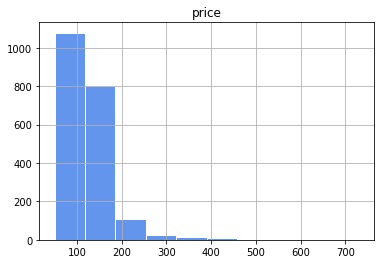

In [36]:
# метод .hist()
# color – цвет заливки
# edgecolor – цвет границ столбцов

df.hist("price", color = "cornflowerblue", edgecolor = "white")

>**Пояснения к коду:** метод `.hist()` строит гистограмму для какого-нибудь столбца датафрейма (в нашем случае он назван `df`), название этого столбца пишется на первом месте в круглых скобках в кавычках. Если не добавлять аргументы `color` и `edgecolor`, будут использоваться цвета по умолчанию. 
>
> Список цветов можно найти в [официальной документации](https://matplotlib.org/stable/gallery/color/named_colors.html). Кроме того, можно выбрать любой свой цвет, например, [в палитре Google](https://g.co/kgs/N5K9og), а затем скопировать его код (например, `#c4296f`) и вставить на место названия цвета в кавычках. 

**Интерпретация графика:** распределение сильно скошено вправо; большинство цен на квартиры сосредоточены в районе 100 тысяч долларов, однако есть небольшое число нетипично дорогих квартир с ценами выше 300 тысяч.

Сравним среднее, медиану и моду:

In [37]:
print(df["price"].mean())
print(df["price"].median())
print(df["price"].mode())

127.49656862745098
115.0
0    110
dtype: int64


**Интерпретация:** средняя цена квартиры равна 127.5 тысячам долларов, 50% квартир не дороже 115 тысяч долларов, самая частая цена квартиры – 110 тысяч долларов. Большая разница между средним и медианой тоже свидетельствует о скошенности распределения (вправо, среднее выше медианы), в данных есть нетипично большие значения.

Построим ящик с усами для того же показателя:

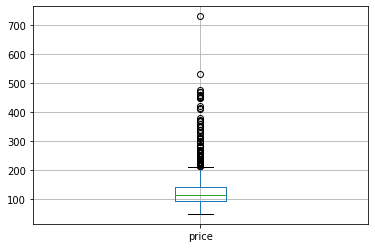

In [38]:
df.boxplot("price")

>**Пояснения к коду:** с настройками цветов у ящиков с усами все сложнее, поэтому соглашаемся на базовые цвета и просто указываем в скобках название столбца, для которого строим ящик с усами.

**Интерпретация:** по графику явно видно, что в данных присутствует немало нетипично больших значений, нетипично маленьких при этом нет. Квартиры с ценой выше 200 тысяч долларов можно считать нетипично дорогими. Минимальная цена равна примерно 50 тысячам долларов, медианная – примерно 115 тысячам долларов. 

Проделаем то же для показателя `livesp` –  изучим распределение жилой площади квартир:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x123aad5d0>]],
      dtype=object)

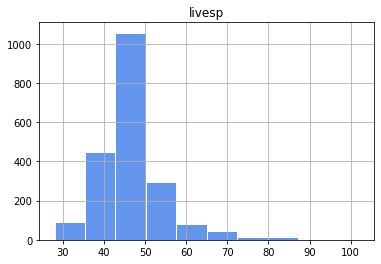

In [39]:
df.hist("livesp", color = "cornflowerblue", edgecolor = "white")

**Интерпретация:** распределение нельзя назвать идеально симметричным, но, тем не менее, оно больше похоже на симметричное, чем предыдущее. Больше всего в наших данных квартир с жилой площадью 45-50 квадратных метров, число квартир с площадью выше или ниже этого диапазона примерно одинаково (симметричность), однако встретить квартиры площадью менее 45 квадратных метров шансов больше.

In [40]:
print(df["livesp"].mean())
print(df["livesp"].median())
print(df["livesp"].mode())

46.33725490196078
45.0
0    45
dtype: int64


**Интерпретация:** среднее чуть-чуть больше медианы, сигнал о небольшой скошенности вправо, однако медиана, мода и среднее почти равны между собой, что свидетельствует в пользу симметричности распределения (опять же, относительной). 

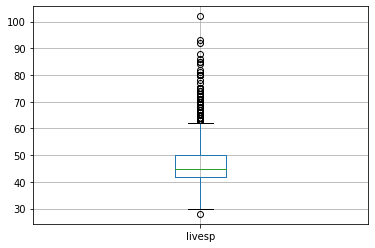

In [41]:
df.boxplot("livesp")

**Интерпретация:** нетипичные значения присутствуют с обеих сторон, однако число нетипичных значений справа значительно. Квартиры площадью выше 62 квадратных метров можно считать нетипично большими для Москвы (на основании тех данных, что у нас есть), а квартиры площадью менее 30 квадратных метров – нетипично маленькими. Кроме того, из графика можно извлечь нижний квартиль (примерно 42) и верхний квартиль (50), а также медиану (45). 

Посмотрим также на особенности распределения расстояния до центра (`dist`):

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x123618290>]],
      dtype=object)

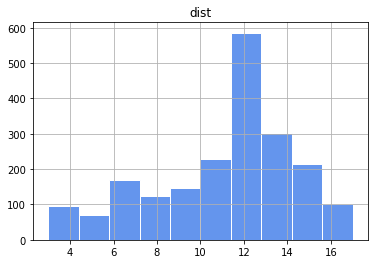

In [42]:
df.hist("dist", color = "cornflowerblue", edgecolor = "white")

**Интерпретация:** вот тут уже скошенность влево, однако эта скошенность не очень сильная, так как нет большого разрыва между высотами столбиков (если бы были нетипичные значения слева, они были бы редкие, и тогда столбики были низкими, вспомните первый график). 

In [43]:
print(df["dist"].mean())
print(df["dist"].median())
print(df["dist"].mode())

11.015686274509823
12.0
0    12.0
dtype: float64


**Интерпретация:** медиана чуть больше среднего – сигнал о скошенности влево, однако разница совсем небольшая, медиана и мода совпадают. 50% квартир удалены от центра не более, чем на 12 километров, эта же удаленность от центра является самой распространенной в наших данных.

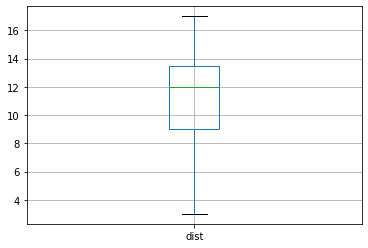

In [44]:
df.boxplot("dist")

**Интерпретация:** тут уже нетипичных значений нет, виден большой размах значений – разброс между минимальным 3 и максимальным 17. То есть, в наборе данных есть очень разные квартиры, как удаленные от центра на 3 километра, так и удаленные на 17 километров. 